In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
trip = pd.read_csv('../data/trip.csv')
data = trip.copy() # 원본 데이터와의 비교 및 확인을 위해 copy를 해줍니다.

In [266]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [268]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 중복값 제거 및 처리

In [269]:
data.duplicated().value_counts()

False    22699
True         2
dtype: int64

In [270]:
data.drop_duplicates(inplace=True)

## 결측치 확인 및 처리

In [271]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [272]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [273]:
data[data["fare_amount"].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


- fare_amount에 결측치가 3개의 결측치가 존재한다.
- 3개의 결측치는 총 데이터 개수인 22701개의 0.0132%에 해당하는 미미한 수준이기에, 이를 제거하고 진행한다.

In [274]:
data.dropna(inplace = True)

In [275]:
print("======결측 데이터 개수======")
print(data.isna().sum())
print("\n======전체 데이터 개수======")
print(data.count())

======결측 데이터 개수======
passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

======전체 데이터 개수======
passenger_name           22696
tpep_pickup_datetime     22696
tpep_dropoff_datetime    22696
payment_method           22696
passenger_count          22696
trip_distance            22696
fare_amount              22696
tip_amount               22696
tolls_amount             22696
dtype: int64


## 데이터 이상치 판단 및 처리
- 데이터의 분포를 확인하면서 이상치 값을 갖는 데이터를 확인해줍니다.
- 이상치를 판단하기 전, datetime 컬럼들을 통해 주행 컬럼을 생성해줍니다.

### 데이터 컬럼 생성 

- total_amount, travel_time 컬럼 추가
- 심야 시간에 얼마나 운영되었는가에 대한 night 컬럼 추가
(시간은 한국 시간에 맞게 임의로 진행 00:00:00 - 04:00:00)

#### 이동시간 관련 컬럼 생성

In [276]:
data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"])

In [277]:
data["travel_datetime"] = pd.to_timedelta(data["tpep_dropoff_datetime"] - data["tpep_pickup_datetime"])

In [278]:
# time parsing
days = data['travel_datetime'].dt.components['days']
hours = data['travel_datetime'].dt.components['hours']
minutes = data['travel_datetime'].dt.components['minutes']
seconds = data['travel_datetime'].dt.components['seconds']

travel_time = (days*24 + hours) * 60 + minutes + seconds/60

In [279]:
data["travel_minutes"] = round(travel_time, 2)

In [280]:
data.head(2)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_datetime,travel_minutes
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,0 days 00:14:04,14.07
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,0 days 00:26:30,26.50


#### 심야시간 관련 컬럼 생성

In [281]:
night_start = pd.to_datetime('00:00:00').time()
night_end = pd.to_datetime('04:00:00').time()

In [282]:
data["tpep_dropoff_datetime"][1].time()

datetime.time(15, 19, 58)

In [283]:
data["tpep_dropoff_datetime"][1].time().hour
data["tpep_dropoff_datetime"][1].time().minute
data["tpep_dropoff_datetime"][1].time().second

58

In [284]:
def parsing_time(row):
    end = min(night_end, row["tpep_dropoff_datetime"].time())
    start = max(night_start, row["tpep_pickup_datetime"].time())
    
    hour = end.hour - start.hour
    minute = end.minute - start.minute
    second = end.second - start.second
    
    if second < 0 : 
        second = second + 60
        minute = minute - 1
        
    if minute < 0:
        minute = minute + 60
        hour = hour - 1
    
    if hour < 0:
        return "00:00:00"
    
    return datetime(1, 1, 1, hour, minute, second).strftime("%H:%M:%S")

In [285]:
data["night_time"] = data.apply(parsing_time, axis = 1)

In [286]:
data["night_time"].value_counts()

00:00:00    20766
00:05:23        8
00:10:52        8
00:06:06        7
00:08:18        7
            ...  
00:17:22        1
00:11:25        1
00:27:44        1
00:03:39        1
00:01:10        1
Name: night_time, Length: 1074, dtype: int64

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22696 non-null  object         
 1   tpep_pickup_datetime   22696 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22696 non-null  datetime64[ns] 
 3   payment_method         22696 non-null  object         
 4   passenger_count        22696 non-null  int64          
 5   trip_distance          22696 non-null  float64        
 6   fare_amount            22696 non-null  float64        
 7   tip_amount             22696 non-null  float64        
 8   tolls_amount           22696 non-null  float64        
 9   travel_datetime        22696 non-null  timedelta64[ns]
 10  travel_minutes         22696 non-null  float64        
 11  night_time             22696 non-null  object         
dtypes: datetime64[ns](2), float64(5), int64(1), ob

### 데이터 분포 및 이상치 확인

#### passenger_count

<AxesSubplot:ylabel='passenger_count'>

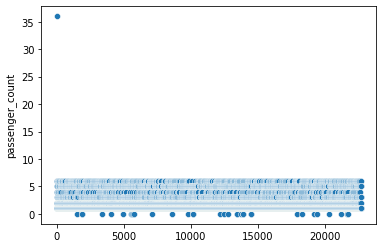

In [288]:
sns.scatterplot(x=data.index, y=data["passenger_count"])

In [289]:
# 이상치 값을 갖는 passenger_count 값을 확인 후 제거합니다.
data.drop(data[data["passenger_count"] > 20].index, inplace = True)
print(data[data["passenger_count"] > 20]["passenger_count"].count())

0


#### trip_distance

<AxesSubplot:ylabel='trip_distance'>

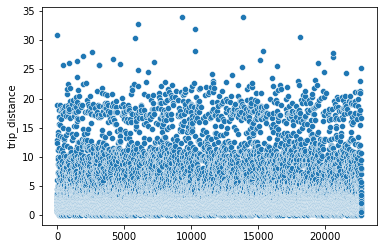

In [290]:
sns.scatterplot(x=data.index, y=data["trip_distance"])

In [291]:
# 높은 값을 갖는 row를 확인합니다. 기준은 30으로 잡습니다.
data[data["trip_distance"] > 30]
# -> 수치상으로 이동 시간, 비용과 거의 비례함을 보이기에 제거하지 않고 넘어갑니다.

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_datetime,travel_minutes,night_time
30,David Burton,2017-11-06 20:30:50,2017-11-07 00:00:00,Credit Card,1,30.83,80.00,18.56,11.52,0 days 03:29:10,209.17,00:00:00
5794,Tamara Bowen MD,2017-08-11 14:14:01,2017-08-11 15:17:31,Cash,1,30.33,52.00,14.64,5.76,0 days 01:03:30,63.50,00:00:00
6066,Tina Knight,2017-06-13 12:30:22,2017-06-13 13:37:51,Debit Card,1,32.72,107.00,55.50,16.26,0 days 01:07:29,67.48,00:00:00
9282,Samantha Frederick,2017-06-18 23:33:25,2017-06-19 00:12:38,Cash,2,33.96,150.00,0.00,0.00,0 days 00:39:13,39.22,00:00:00
10293,Emily Stevens,2017-09-11 11:41:04,2017-09-11 12:18:58,Cash,1,31.95,131.00,0.00,0.00,0 days 00:37:54,37.90,00:00:00
13863,William Yates,2017-05-19 08:20:21,2017-05-19 09:20:30,Credit Card,1,33.92,200.01,51.64,5.76,0 days 01:00:09,60.15,00:00:00
18132,Jose Deleon,2017-10-26 14:45:01,2017-10-26 16:12:49,Debit Card,1,30.50,90.50,19.85,8.16,0 days 01:27:48,87.80,00:00:00


#### fare_amount

<AxesSubplot:ylabel='fare_amount'>

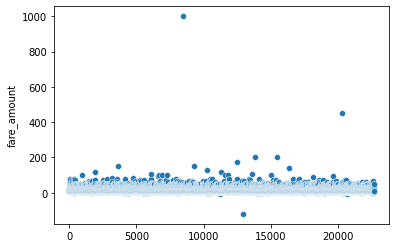

In [292]:
sns.scatterplot(x=data.index, y=data["fare_amount"])

In [293]:
# 이상치를 갖는 값의 row를 확인합니다.
data[data["fare_amount"] > 300]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_datetime,travel_minutes,night_time
8478,Alexis Hanson,2017-02-06 05:50:10,2017-02-06 05:51:08,Credit Card,1,2.6,999.99,200.0,0.0,0 days 00:00:58,0.97,00:00:00
20314,Nicholas Thomas,2017-12-19 09:40:46,2017-12-19 09:40:55,Cash,2,0.0,450.00,0.0,0.0,0 days 00:00:09,0.15,00:00:00


In [294]:
# 확인해보니, 이동 시간 및 거리와 관련해서 전혀 연관이 없어 해당 로우를 제거합니다.
data.drop(data[data["fare_amount"] > 300].index, inplace = True)

#### tip_amount

<AxesSubplot:ylabel='tip_amount'>

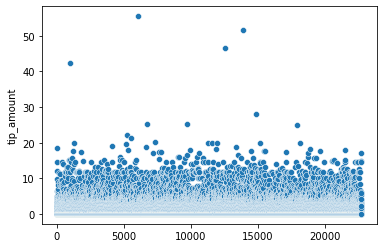

In [295]:
sns.scatterplot(x=data.index, y=data["tip_amount"])

In [296]:
# 동일하게 확인해줍니다.
data[data["tip_amount"] > 30]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_datetime,travel_minutes,night_time
986,Elaine Horton,2017-08-23 18:23:26,2017-08-23 19:18:29,Cash,1,16.70,52.00,42.29,0.00,0 days 00:55:03,55.05,00:00:00
6066,Tina Knight,2017-06-13 12:30:22,2017-06-13 13:37:51,Debit Card,1,32.72,107.00,55.50,16.26,0 days 01:07:29,67.48,00:00:00
12513,Mr. Wesley Reyes,2017-12-17 18:24:24,2017-12-17 18:24:42,Cash,1,0.00,175.00,46.69,11.75,0 days 00:00:18,0.30,00:00:00
13863,William Yates,2017-05-19 08:20:21,2017-05-19 09:20:30,Credit Card,1,33.92,200.01,51.64,5.76,0 days 01:00:09,60.15,00:00:00


In [297]:
# fare에 비해 과하게 팁이 높은 경우가 존재합니다.
# 추가적으로 trip_distance가 0임에도 175$의 금액이 결제된 row도 이상치로 판단, 함께 제거합니다.
data.drop(data[data["tip_amount"] > 30].index, inplace = True)
data.drop(data[data["trip_distance"] == 0].index, inplace = True)

#### tolls_amounts

<AxesSubplot:ylabel='tolls_amount'>

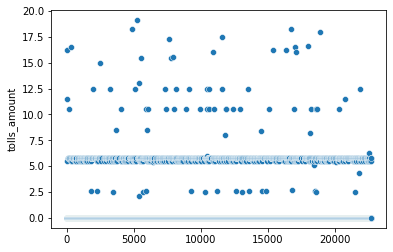

In [298]:
sns.scatterplot(x=data.index, y=data["tolls_amount"])

In [299]:
# tolls amount의 경우 이상치라고 판단하기는 어려우나, 다른 값에 비해 높은 값들을 확인해봅니다.
data[data["tolls_amount"] > 15]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_datetime,travel_minutes,night_time
22,Jacqueline Mclean DVM,2017-10-11 12:34:49,2017-10-11 13:22:38,Debit Card,1,12.30,68.25,12.00,16.26,0 days 00:47:49,47.82,00:00:00
318,Tanya Arroyo,2017-07-20 13:21:55,2017-07-20 14:21:20,Credit Card,1,17.86,78.00,0.00,16.50,0 days 00:59:25,59.42,00:00:00
4887,Joshua Jensen,2017-04-14 07:36:09,2017-04-14 08:08:02,Credit Card,1,18.99,68.00,15.00,18.26,0 days 00:31:53,31.88,00:00:00
5273,Melvin Henderson III,2017-12-07 13:48:52,2017-12-07 14:29:07,Credit Card,1,17.96,70.00,17.88,19.10,0 days 00:40:15,40.25,00:00:00
5538,Alexander Giles Jr.,2017-03-16 12:14:51,2017-03-16 12:52:36,Cash,1,17.50,69.50,21.30,15.50,0 days 00:37:45,37.75,00:00:00
7629,Thomas Rodgers,2017-09-25 19:53:56,2017-09-25 20:39:01,Credit Card,5,20.28,57.50,15.32,17.28,0 days 00:45:05,45.08,00:00:00
7748,Jonathan Lloyd,2017-01-24 11:48:23,2017-01-24 12:34:10,Cash,2,18.13,71.00,17.36,15.50,0 days 00:45:47,45.78,00:00:00
7931,James Blackburn,2017-01-10 10:35:22,2017-01-10 11:07:05,Credit Card,2,17.53,75.00,0.00,15.58,0 days 00:31:43,31.72,00:00:00
10877,Thomas Smith,2017-07-23 15:46:30,2017-07-23 16:20:50,Cash,2,14.67,61.50,15.56,16.00,0 days 00:34:20,34.33,00:00:00
11562,Alexis Chang,2017-09-17 11:54:41,2017-09-17 12:24:21,Debit Card,1,17.86,67.00,12.00,17.50,0 days 00:29:40,29.67,00:00:00


In [300]:
# 대부분의 경우 거리가 먼 장거리 운행을 했기에 toll 비용이 높아졌다고 판단됩니다.

#### travel_minutes

<AxesSubplot:ylabel='travel_minutes'>

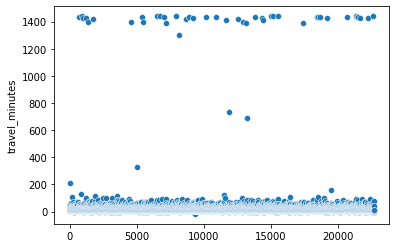

In [301]:
sns.scatterplot(x=data.index, y=data["travel_minutes"])

In [302]:
# 위 두 항목은 travel minute의 경우 이상치가 존재한다고 판단하여 이를 제거하였습니다.
# travel minute이 음수이거나 0인 경우를 살펴봅니다.

data[data["travel_minutes"] <= 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,travel_datetime,travel_minutes,night_time
9358,Donna Summers,2017-11-05 01:23:08,2017-11-05 01:06:09,Cash,1,5.7,28.0,0.0,0.0,-1 days +23:43:01,-16.98,00:00:00


In [303]:
# 해당 row는 이상치라고 판단, 이를 제거해줍니다.
data.drop(data[data["travel_minutes"] <= 0].index, inplace=True)

## Payment_method 변환

- payment method 열을 수정합니다. 
- Credit Card와 Debit Card를 모두 Card로 변환해줍니다.

In [307]:
data["payment_method"].value_counts()

Cash           11117
Debit Card      5743
Credit Card     5682
Name: payment_method, dtype: int64

In [316]:
data["payment_method"] = data["payment_method"].apply(lambda x: "Card" if x.split(" ")[-1] == "Card" else "Cash")

In [317]:
data["payment_method"].value_counts()

Card    11425
Cash    11117
Name: payment_method, dtype: int64

- Card면 1, Cash면 0으로 변환해서, is_card 열을 새로 만들어줍니다.

In [318]:
data["is_card"] = data["payment_method"].apply(lambda x: 1 if x == "Card" else 0)

<AxesSubplot:ylabel='is_card'>

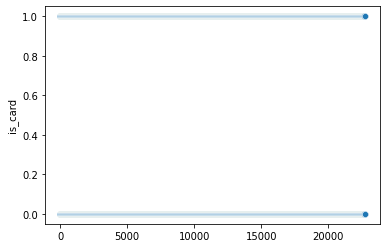

In [322]:
sns.scatterplot(x=data.index, y=data["is_card"])

## 변수간 상관관계 파악

In [320]:
correlation_matrix = data.corr()

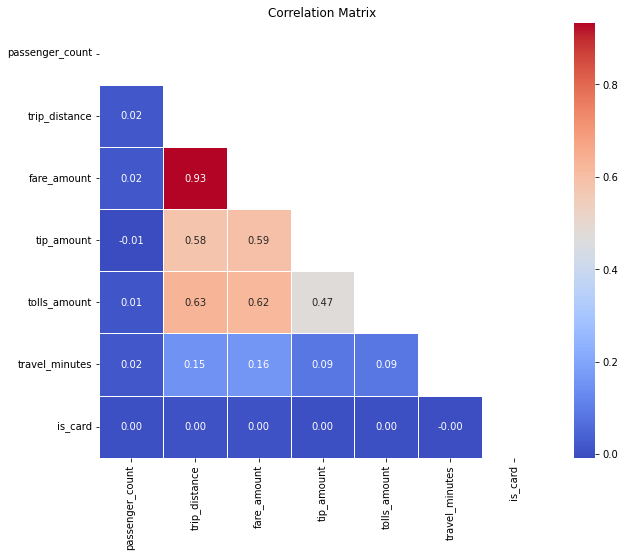

In [321]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, linewidths=.5, ax=ax)
plt.title('Correlation Matrix')
plt.show()

## 회고

금일 진행했던 데이터 insight 관련 프로젝트는 정말 어려웠던 것 같습니다.
고려해야되는 상황과 변수가 너무 많고, 그에 비해서 어떻게 활용해야 더욱 좋은 결과를 얻을 수 있을지 생각하는게 굉장히 어려웠습니다.

원하는 결과를 얻지도 못하였기에 조금 더 힘들었던 것 같습니다.
하지만, 팀원들과 이야기를 나누는 과정에서 아이디어도 얻을 수 있었고 이를 바탕으로 더욱 성장할 수 있는 좋은 계기가 되었던 하루인 것 같습니다.
또한 부족한 부분에 대해 조금 더 공부해야겠습니다.. ㅎㅎ